In [111]:
'''
Lewo 
Momenty zwykłe
Teoretyczne

'''
'''
Prawo
Momenty centralne


'''

'\nPrawo\nMomenty centralne\n\n\n'

<BarContainer object of 7 artists>

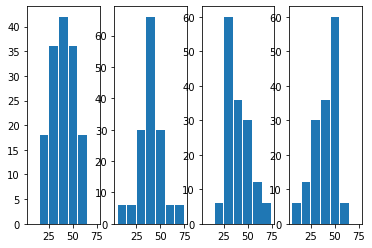

In [160]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import scipy.stats

data = np.genfromtxt('data.csv', delimiter=";",dtype=np.int32)
# Uwaga implementacujna:
# Pirewsza kolumna to nie zestawy danych, a środki klas


data_index = data[:,0]
data_index = data_index.astype(np.string_)

#plt.subplots(2,2)
plt.subplot(1,4,1).bar(data[:,0], data[:,1], width=9)
plt.subplot(1,4,2).bar(data[:,0], data[:,2], width=9)
plt.subplot(1,4,3).bar(data[:,0], data[:,3], width=9)
plt.subplot(1,4,4).bar(data[:,0], data[:,4], width=9)
#plt.xticks(np.arange(20))
#plt.plot()



In [ ]:
# Średnie z danych:
means = np.zeros(4)
for i in range(len(means)):
    means[i] = np.mean(data[:, i+1])

#print(means)

momentums = np.zeros((4,4))

def momentums(data): #Otrzymuje tabelę danych, zwraca tablicę momentów 4x4
    means = np.zeros(4)
    for i in range(len(means)):
        for j in range(len(data)):
            means[i] += data[j,0]*data[j,i+1]
    for i in range(len(means)):
        means[i] = means[i]/150
    # momenty:
    momentums = np.zeros((4,4))
    for i in range(len(means)):
        for j in range(len(data)):
            #print(f'({data[j,0]} - {means[i]}) * {data[j, i+1]}')
            momentums[i, 0] += (pow((data[j,0] - means[i]), 1) * data[j, i+1])
            momentums[i, 1] += (pow((data[j,0] - means[i]), 2) * data[j, i+1])
            momentums[i, 2] += (pow((data[j,0] - means[i]), 3) * data[j, i+1])
            momentums[i, 3] += (pow((data[j,0] - means[i]), 4) * data[j, i+1])
    
    for i in range(len(momentums)):
        momentums[i] = momentums[i]/150
    
    return momentums

# Otrzymanie momentów:
momentums = momentums(data)
print(momentums)

dev = np.zeros(4)

for i in range(len(dev)):
    dev[i] = scipy.stats.tstd(data[:, i+1])

print(dev)

# Współczynnik skośności

skew = np.zeros(4)

for i in range(len(skew)):
    skew[i] = momentums[i, 2] / dev[i]**3

print(skew)

# Współczynnik koncentracji skupienia:

coef_cont = np.zeros(4)

for i in range(len(coef_cont)):
    coef_cont[i] = momentums[i, 3] / dev[i]**4

print(coef_cont)

# Współczynnik zmiany:

change_coef = np.zeros(4)

for i in range(len(change_coef)):
    change_coef[i] = (dev[i] / means[i])*100

print(change_coef)

[[    0.   144.     0. 43200.]
 [    0.   144.     0. 81600.]
 [    0.   144.  1200. 57600.]
 [    0.   144. -1200. 57600.]]
[17.27095001 22.67786838 21.59364986 21.59364986]
[ 0.          0.          0.11917992 -0.11917992]
[0.4855331  0.30851852 0.26492215 0.26492215]
[ 80.59776672 105.83005244 100.77036601 100.77036601]
